In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape

import matplotlib.pyplot as plt
import numpy as np

In [12]:
data = pd.read_csv('data.csv')

# STAGE 1

Simple linear regression to predict salary based on player rating

Create X dataframe with 'rating' column as my predictor variable and a y target 'salary'

In [13]:
X = data[['rating']]
y = data['salary']

Split data into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

I will fit a linear regression model on the training set using salary ~ rating

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Visualising the model/relationship

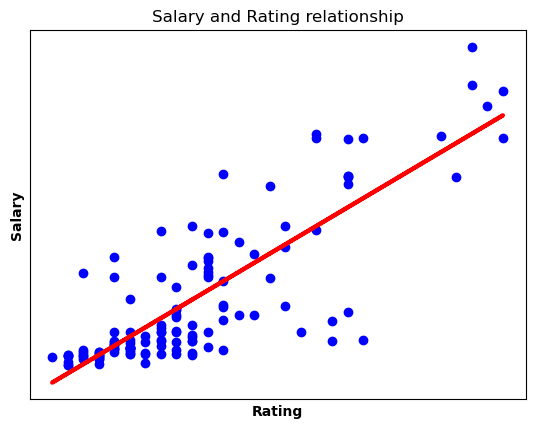

In [31]:
plt.scatter(X_test,y_test, color="blue")
plt.plot(X_test, y_pred, color="red", linewidth=3)
plt.xlabel("Rating", fontweight="bold")
plt.ylabel("Salary", fontweight="bold")
plt.title('Salary and Rating relationship')
plt.xticks(())
plt.yticks(())
plt.show()

Predict salary and calculate the MAPE

In [16]:
y_pred = model.predict(X_test)
mape_calculation = round(mape(y_test, y_pred),5)
model_intercept = model.intercept_
coef = model.coef_[0]

Print three float numbers: the model intercept, the slope, and the MAPE rounded to five decimal places and separated by whitespace.

In [17]:
print(f"{model_intercept:.5f} {coef:.5f} {mape_calculation:.5f}")

-92394937.42462 1322928.79254 1.20990


# STAGE 2


Because in stage 1 the relationship between salary and rating looks more polynomial than linear we will raise the rating to see if scores improve.

New step  -  Raise predictor to the power of 2,3 and 4. Will define a function for evaluating the model

In [18]:
values = []
def evaluate_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape_calculation = round(mape(y_test, y_pred), 5)
    return mape_calculation

In [30]:
X_power_2 = X**2
values.append(evaluate_model(X_power_2, y))

X_power_3 = X**3
values.append(evaluate_model(X_power_3, y))

X_power_4 = X**4
values.append(evaluate_model(X_power_4, y))

Print smallest MAPE, because the lower the MAPE value the better the model performance, as MAPE is a loss function

In [20]:
print(min(values))

0.94182
